In [166]:
library(readr)
library(tidyr)
library(ggplot2)
library(viridis)
library(dplyr)
coffee <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-05-14/coffee_survey.csv")

Rows: 4042 Columns: 57
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (44): submission_id, age, cups, where_drink, brew, brew_other, purchase,...
dbl (13): expertise, coffee_a_bitterness, coffee_a_acidity, coffee_a_persona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [167]:
coffee_long <- data.frame(
  sample_id = rep(c("Coffee A", "Coffee B", "Coffee C", "Coffee D"), each = nrow(coffee)),
  gender = rep(coffee$gender, 4),
  preference = c(coffee$coffee_a_personal_preference, coffee$coffee_b_personal_preference,
                 coffee$coffee_c_personal_preference, coffee$coffee_d_personal_preference),
  acidity = c(coffee$coffee_a_acidity, coffee$coffee_b_acidity,
              coffee$coffee_c_acidity, coffee$coffee_d_acidity),
  bitterness = c(coffee$coffee_a_bitterness, coffee$coffee_b_bitterness,
                 coffee$coffee_c_bitterness, coffee$coffee_d_bitterness)
 )

In [168]:
head(coffee_long)

,sample_id,gender,preference,acidity,bitterness
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Coffee A,NA,NA,NA,NA
2,Coffee A,NA,NA,NA,NA
3,Coffee A,NA,NA,NA,NA
4,Coffee A,NA,NA,NA,NA
5,Coffee A,NA,NA,NA,NA
6,Coffee A,NA,NA,NA,NA


In [169]:
coffee_summarypref <- coffee %>%summarise(mean_A = mean(coffee_a_personal_preference, na.rm = TRUE), mean_B = mean(coffee_b_personal_preference, na.rm = TRUE),mean_C = mean(coffee_c_personal_preference, na.rm = TRUE),mean_D = mean(coffee_d_personal_preference, na.rm = TRUE))


In [170]:
coffee_summarypref

mean_A,mean_B,mean_C,mean_D
<dbl>,<dbl>,<dbl>,<dbl>
3.3109,3.068646,3.06479,3.37593


Warning message:
“Removed 1076 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


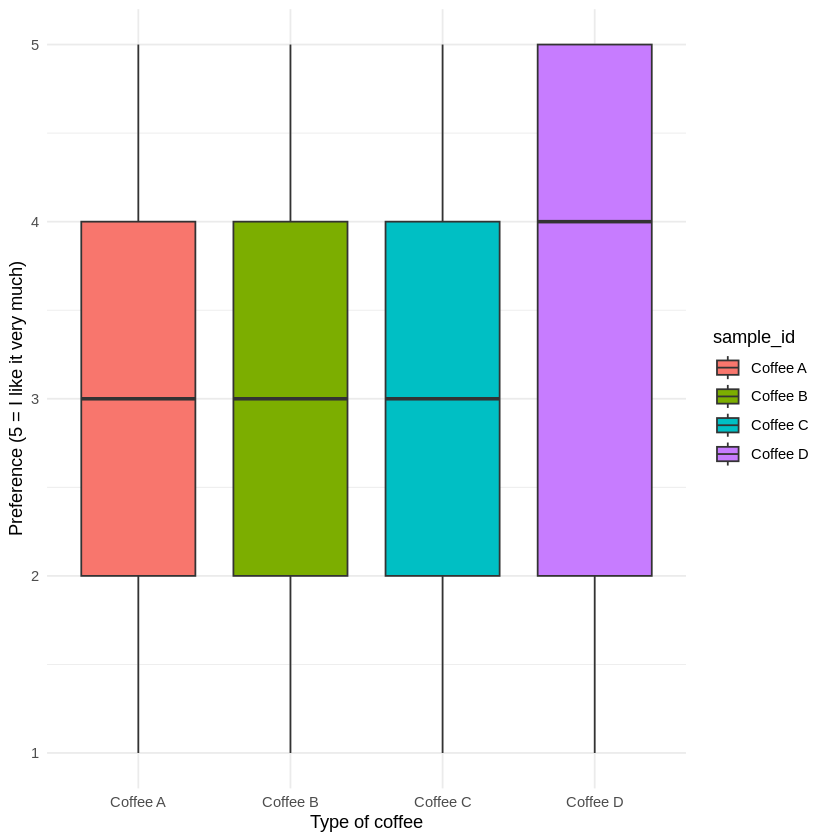

In [187]:
ggplot(coffee_long, aes(x = sample_id, y = preference, fill = sample_id)) +
  geom_boxplot() +
  labs(
    x = "Type of coffee",
    y = "Preference (5 = I like it very much)"
  ) +
  theme_minimal()

In [188]:
coffee_bygenderacid <- coffee_long %>% drop_na(gender, acidity) %>% filter(gender %in% c("Male", "Female"))

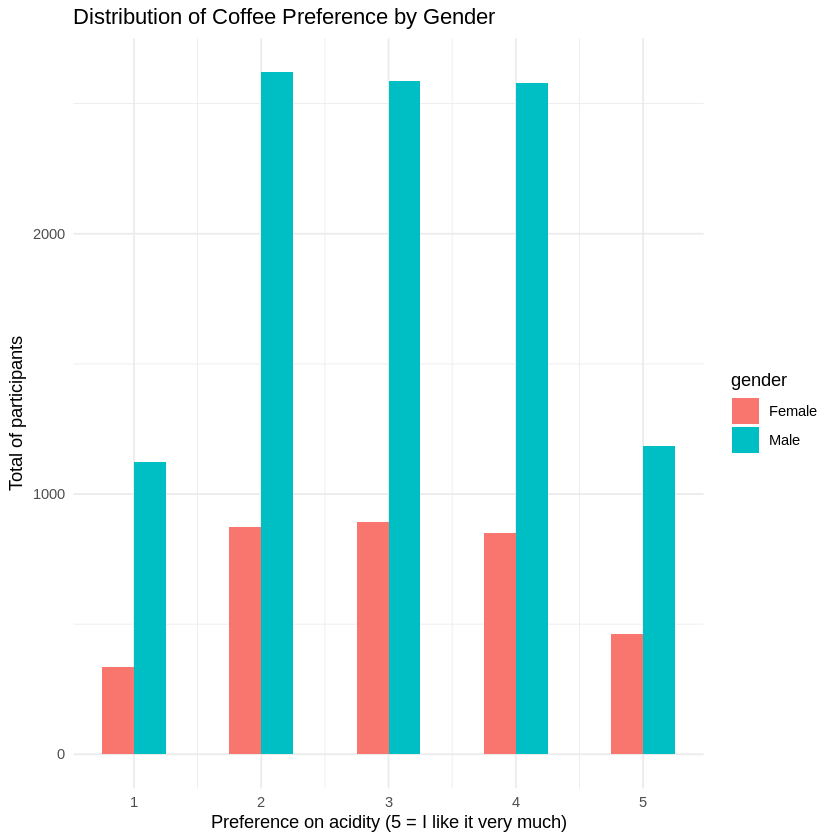

In [173]:
ggplot(coffee_bygenderacid, aes(x = acidity, fill = gender)) + geom_histogram(binwidth = 0.5, position = "dodge") + theme_minimal() +
  labs(
    title = "Distribution of Coffee Preference by Gender",
    x = "Preference on acidity (5 = I like it very much)",
    y = "Total of participants"
  )

In [174]:
coffee_bygenderbit <- coffee_long %>%
  drop_na(gender, bitterness) %>%
  # Keep only the main categories to make the graph clear
  filter(gender %in% c("Male", "Female"))

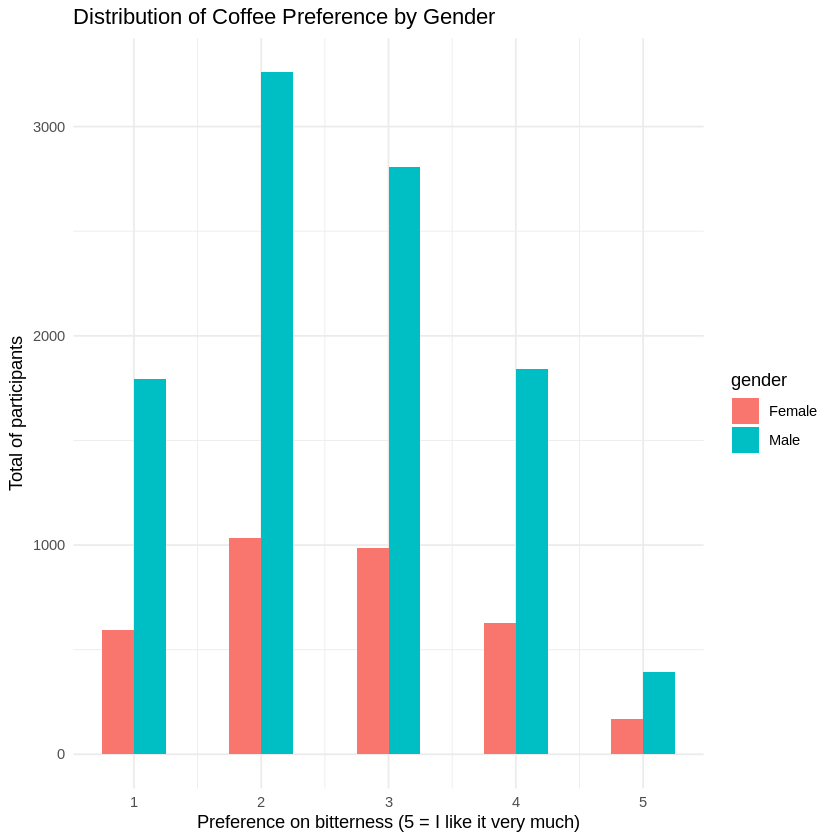

In [175]:
ggplot(coffee_bygenderbit, aes(x = bitterness, fill = gender)) + geom_histogram(binwidth = 0.5, position = "dodge") + theme_minimal() +
  labs(
    title = "Distribution of Coffee Preference by Gender",
    x = "Preference on bitterness (5 = I like it very much)",
    y = "Total of participants"
  )

In [176]:
coffee_t.test <- t.test(coffee$coffee_a_personal_preference,
                         coffee$coffee_d_personal_preference,
                         paired = TRUE)

In [177]:
coffee_t.test


	Paired t-test

data:  coffee$coffee_a_personal_preference and coffee$coffee_d_personal_preference
t = -2.3988, df = 3755, p-value = 0.0165
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.11563821 -0.01162484
sample estimates:
mean difference 
    -0.06363152 


Warning message:
“Removed 286 rows containing missing values or values outside the scale range
(`geom_point()`).”


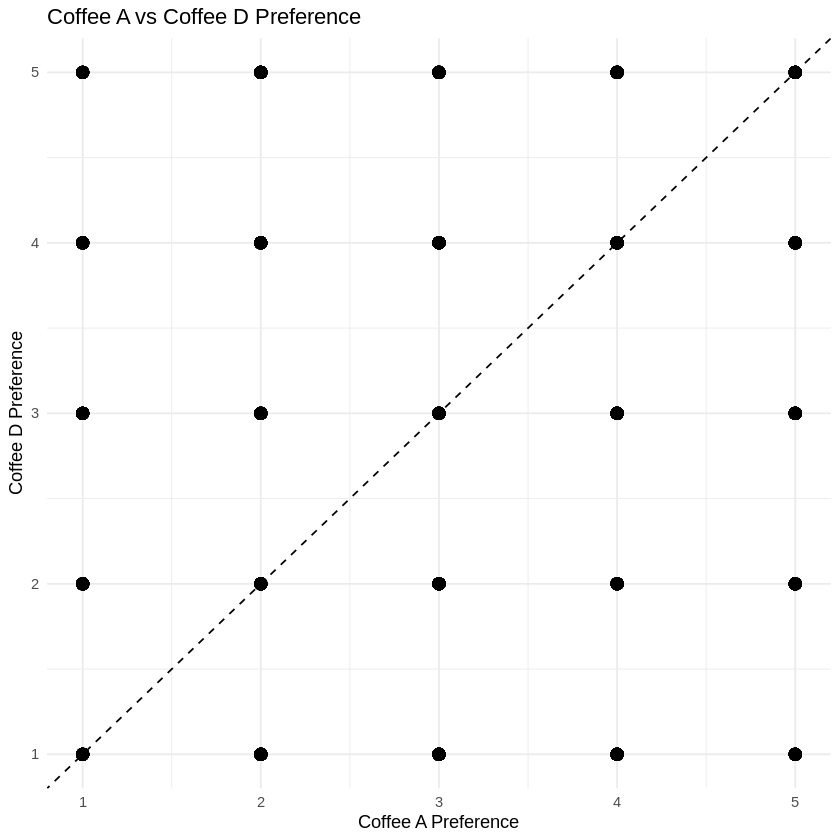

In [178]:
ggplot(coffee,
       aes(x = coffee_a_personal_preference, y = coffee_d_personal_preference)) + geom_point(size = 3, alpha = 0.8) + geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
  labs(
    title = "Coffee A vs Coffee D Preference",
    x = "Coffee A Preference",
    y = "Coffee D Preference"
  ) +
  theme_minimal()

In [179]:
model_A <- lm(coffee_a_personal_preference ~ coffee_a_bitterness + coffee_a_acidity, data = coffee)
summary(model_A)


Call:
lm(formula = coffee_a_personal_preference ~ coffee_a_bitterness + 
    coffee_a_acidity, data = coffee)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7445 -0.9103  0.1517  0.7399  2.4504 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.04323    0.08867  45.600  < 2e-16 ***
coffee_a_bitterness -0.23681    0.02015 -11.749  < 2e-16 ***
coffee_a_acidity    -0.06191    0.01942  -3.188  0.00144 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.164 on 3764 degrees of freedom
  (275 observations deleted due to missingness)
Multiple R-squared:  0.0363,	Adjusted R-squared:  0.03579 
F-statistic:  70.9 on 2 and 3764 DF,  p-value: < 2.2e-16


In [180]:
model_B <- lm(coffee_b_personal_preference ~ coffee_b_bitterness + coffee_b_acidity, data = coffee)
summary(model_B)


Call:
lm(formula = coffee_b_personal_preference ~ coffee_b_bitterness + 
    coffee_b_acidity, data = coffee)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57242 -0.84630 -0.06237  0.89868  2.40872 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.63271    0.07474  48.607   <2e-16 ***
coffee_b_bitterness -0.21608    0.01796 -12.031   <2e-16 ***
coffee_b_acidity     0.03894    0.02062   1.889    0.059 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.092 on 3756 degrees of freedom
  (283 observations deleted due to missingness)
Multiple R-squared:  0.03861,	Adjusted R-squared:  0.0381 
F-statistic: 75.42 on 2 and 3756 DF,  p-value: < 2.2e-16


In [181]:
model_C <- lm(coffee_c_personal_preference ~ coffee_c_bitterness + coffee_c_acidity,data = coffee)
summary(model_C)


Call:
lm(formula = coffee_c_personal_preference ~ coffee_c_bitterness + 
    coffee_c_acidity, data = coffee)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7107 -0.8060 -0.0412  0.8593  2.4293 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.54798    0.07716  45.980  < 2e-16 ***
coffee_c_bitterness -0.23525    0.01801 -13.066  < 2e-16 ***
coffee_c_acidity     0.09949    0.01955   5.089 3.78e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.097 on 3739 degrees of freedom
  (300 observations deleted due to missingness)
Multiple R-squared:  0.05304,	Adjusted R-squared:  0.05253 
F-statistic: 104.7 on 2 and 3739 DF,  p-value: < 2.2e-16


In [182]:
model_D <- lm(coffee_d_personal_preference ~ coffee_d_bitterness + coffee_d_acidity, data = coffee)
summary(model_D)


Call:
lm(formula = coffee_d_personal_preference ~ coffee_d_bitterness + 
    coffee_d_acidity, data = coffee)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1741 -1.0961  0.2835  1.1691  2.9039 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.69355    0.10480   44.79  < 2e-16 ***
coffee_d_bitterness -0.40510    0.02102  -19.27  < 2e-16 ***
coffee_d_acidity    -0.11439    0.02256   -5.07 4.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.385 on 3748 degrees of freedom
  (291 observations deleted due to missingness)
Multiple R-squared:  0.09223,	Adjusted R-squared:  0.09175 
F-statistic: 190.4 on 2 and 3748 DF,  p-value: < 2.2e-16


In [183]:
Plot_bitternss <- data.frame(coffee = rep(c("A","B","C","D"), each = nrow(coffee)),
  bitterness = c(coffee$coffee_a_bitterness,
                 coffee$coffee_b_bitterness,
                 coffee$coffee_c_bitterness,
                 coffee$coffee_d_bitterness),
  preference = c(coffee$coffee_a_personal_preference,
                 coffee$coffee_b_personal_preference,
                 coffee$coffee_c_personal_preference,
                 coffee$coffee_d_personal_preference)
)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1102 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1102 rows containing missing values or values outside the scale range
(`geom_point()`).”


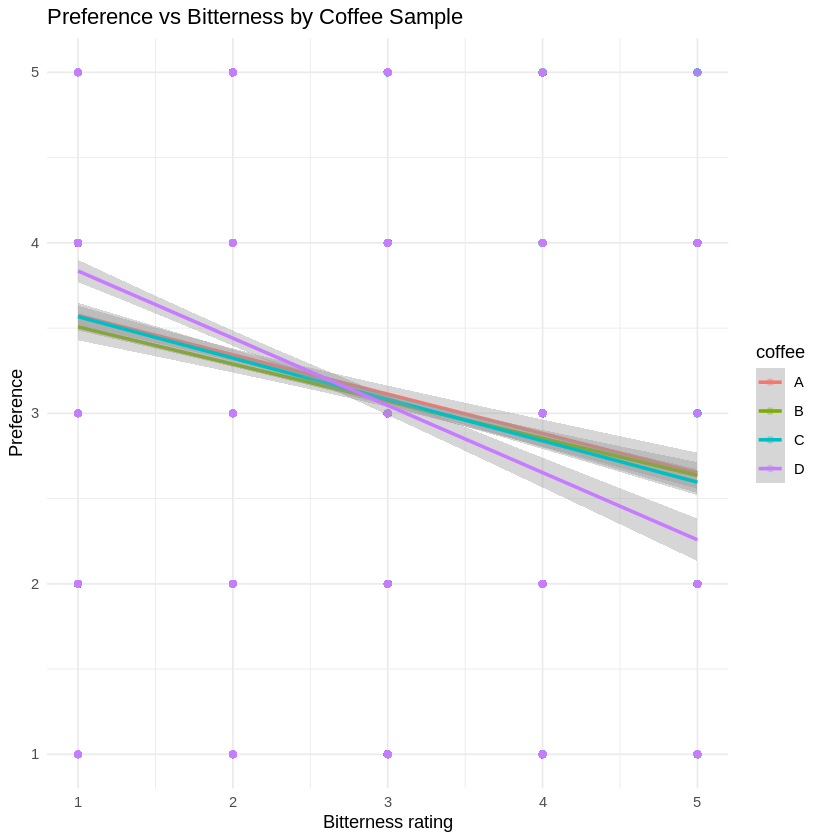

In [184]:

ggplot(Plot_bitternss, aes(x = bitterness, y = preference, color = coffee)) + geom_point(alpha = 0.3) + geom_smooth(method = "lm", se = TRUE) +
  labs(
    title = "Preference vs Bitterness by Coffee Sample",
    x = "Bitterness rating",
    y = "Preference") +
  theme_minimal()

In [185]:
Plot_acidity <- data.frame( coffee = rep(c("A","B","C","D"), each = nrow(coffee)),
  acidity = c(coffee$coffee_a_acidity,
              coffee$coffee_b_acidity,
              coffee$coffee_c_acidity,
              coffee$coffee_d_acidity),
  preference = c(coffee$coffee_a_personal_preference,
                 coffee$coffee_b_personal_preference,
                 coffee$coffee_c_personal_preference,
                 coffee$coffee_d_personal_preference)
)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1141 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1141 rows containing missing values or values outside the scale range
(`geom_point()`).”


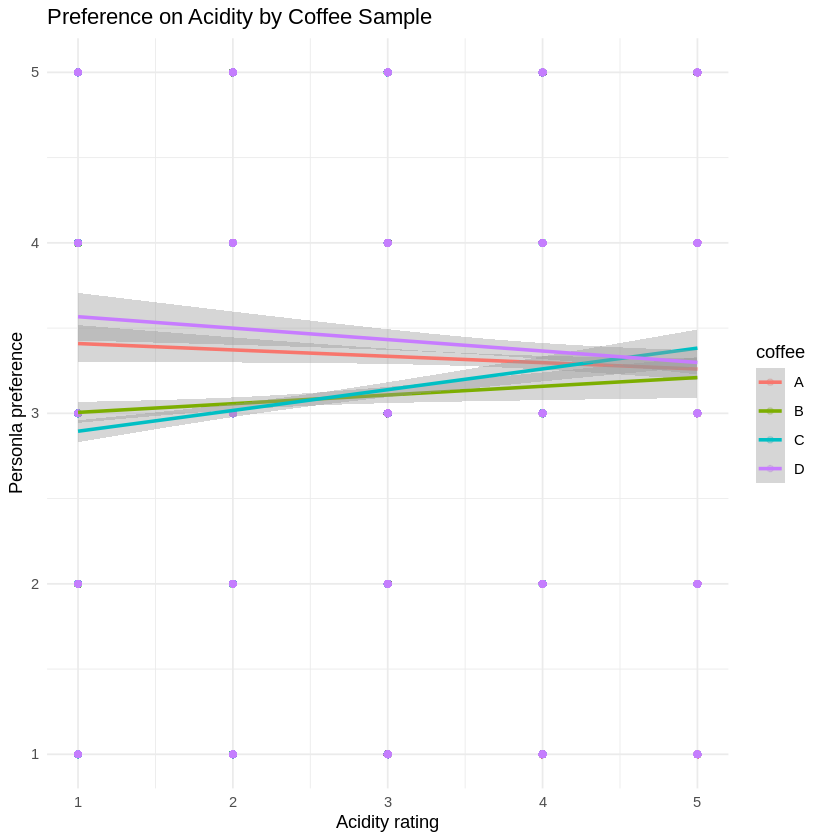

In [186]:
ggplot(Plot_acidity, aes(x = acidity, y = preference, color = coffee)) + geom_point(alpha = 0.3) + geom_smooth(method = "lm", se = TRUE) +
  labs(
    title = "Preference on Acidity by Coffee Sample",
    x = "Acidity rating",
    y = "Personla preference"
  ) +
  theme_minimal()